In [25]:
import numpy as np
from tqdm import tqdm

In [26]:
def num_samples_per_mode(num_modes, total_points):
    """
    Returns the number of points to sample for each number of mode.
    
    Args:
        num_modes: number of different modes in the multimodal distribution
        total_points: total number of points to draw for all modes
        
    Returns:
        array with the number of samples per mode. the elements sum to total_points
    """
    prob_per_mode = np.random.dirichlet(np.ones(num_modes))
    num_samples = []
    
    for i in range(num_modes):
        
        if i == num_modes - 1: # if the last mode:
            num = total_points - sum(num_samples)
        else:
            num = int(prob_per_mode[i] * total_points)
            
        num_samples.append(num)
        
    return np.array(num_samples)

In [27]:
def draw_binned_gaussian(num_data, num_samples, num_bins, num_modes):
    """
    Returns (binned_data, binned_edges)
    binned_data contains the binned training data, has dimensions [num_data, num_bins]
    binned_edges contains the binned edges, has dimensions [num_data, num_bins+1]
    
    Args:
        num_data: number of data points (full batch size)
        num_samples: number of samples/particles to draw
        num_bins: number of bins
        num_modes: number of modes you want in the data. each data
                   point will have a random number of modes from 1 to num_modes
    """
    
    binned_data = []
    edges = []
    
    for i in tqdm(range(num_data)):
        num_mode = np.random.randint(low=1, high=num_modes)
        num_samples_list = num_samples_per_mode(num_mode, num_samples)
        mode_means = np.linspace(-10, 10, num_mode)
        
        points = []
        
        for i, n_samples in enumerate(num_samples_list):
            mean = np.random.uniform(-10,10)
            std = np.random.uniform(0.1,0.4)
            points_ = np.random.normal(loc=mode_means[i], scale=std, size=n_samples)
            points.extend(points_)
            
        bins_, edges_ = np.histogram(points, bins=num_bins)
        bins_ = bins_/num_samples
        edges_ = (edges_[:-1] + edges_[1:])/2
    
        binned_data.append(bins_)
        edges.append(edges_)
        
    return np.array(binned_data), np.array(edges)
        

In [28]:
train_num_data = 50000
test_num_data = 5000
num_samples = 10000
num_bins = 100
num_modes = 20

train_data, train_edges = draw_binned_gaussian(train_num_data, num_samples, num_bins, num_modes)
test_data, test_edges = draw_binned_gaussian(test_num_data, num_samples, num_bins, num_modes)
np.save("data/train_data.npy", train_data)
np.save("data/train_edges.npy", train_edges)
np.save("data/test_data.npy", test_data)
np.save("data/test_edges.npy", test_edges)

100%|██████████| 5000/5000 [00:12<00:00, 397.35it/s]


In [29]:
import matplotlib.pyplot as plt

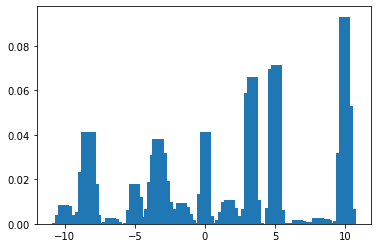

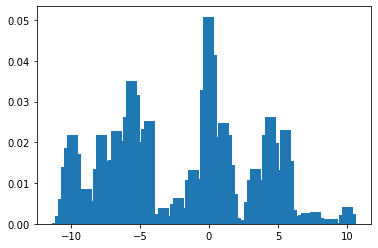

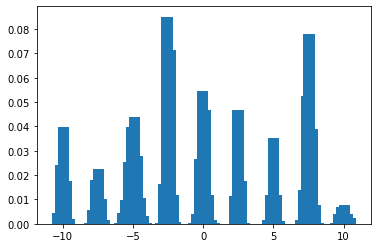

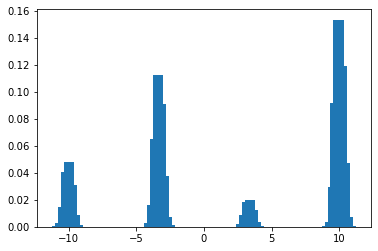

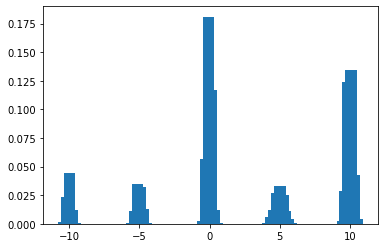

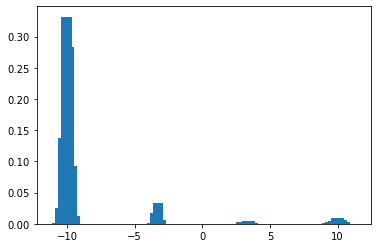

In [30]:
for i in range(len(train_data)):
    bins = train_data[i]
    edges = train_edges[i]
    
    if i > 5:
        break
        
    plt.bar(edges, bins, align='center')
    plt.show()